In [ ]:
#default_exp example_graphs

In [ ]:
%load_ext autoreload
%autoreload 2

# Example directed graphs

> Various functions to generate examples of directed graphs (DAGs),
> mainly graphs from various [related works](01_related.ipynb)

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
import networkx as nx
import matplotlib.pyplot as plt


## Crown DAG known as $S_3^0$ graph

Generate crown DAG (Directed Acyclic Graph), also known as $S_3^0$ graph.

This graph is taken from FELINE paper (2014), where it is used to show _falsely-implied path_ or _false-positive_ of the FELINE index.

This graph is shown in Figure 4 of the FELINE paper.

In [ ]:
#export
def crown_DAG():
    """Returns crown DAG known as S_3^0 graph
    
    Returns
    -------
    graph : networkx.DiGraph
        Crown DAG also known as S_3^0 directed graph
    """
    DG=nx.DiGraph()
    DG.add_nodes_from([1,2,3,4,'u','v'])
    DG.add_edges_from([(1,2),(3,4),(1,'v'),(3,'v'),('u',2),('u',4)])
    return DG

### Draw the crown DAG (`crown_DAG()`)

Draw the 6-nodes crown DAG, known as $S_3^0$ graph, using \[automatic\] shell layout:

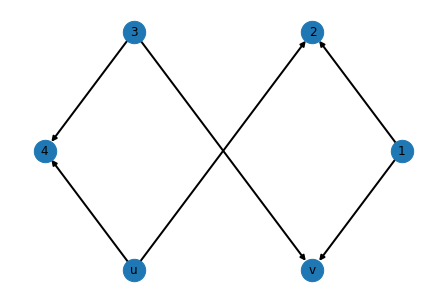

In [ ]:
#@title Draw the $S_3^0$ graph using [automatic] shell layout
DG=crown_DAG()
nx.draw_shell(DG,with_labels=True,node_size=500,width=2.0)

Drawing the crown DAG with circular layout results in the same plot as with shell layout, shown above.

Draw the 6-nodes crown DAG, known as $S_3^0$ graph, using the default spring layout positioning:

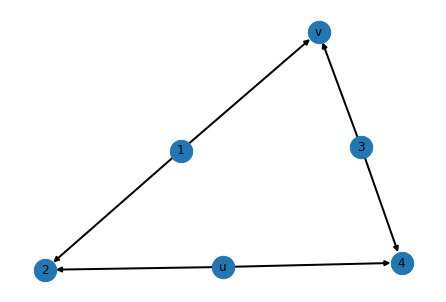

In [ ]:
DG=crown_DAG()
nx.draw(DG,with_labels=True,node_size=500,width=2.0)

In [ ]:
#DG=crown_DAG()
#nx.draw_kamada_kawai(DG,with_labels=True,node_size=500,width=2.0)

Draw the 6-nodes crown DAG, known as the $S_3^0$ graph, using automatic bipartite layout.

This is similar layout to the one used in left side of Figure 4 in the FELINE paper, just with changed order of nodes in each of sets of vertices (each partition).

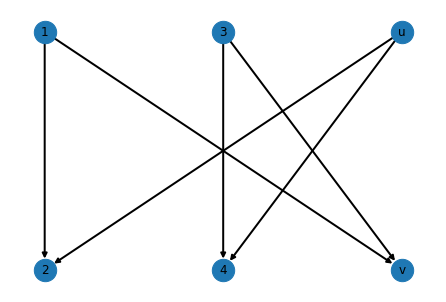

In [ ]:
DG=crown_DAG()
nx.draw(DG,pos=nx.bipartite_layout(DG,[1,'u',3],align='horizontal'),
        with_labels=True,node_size=500,width=2.0)

Draw the crown DAG known as $S_3^0$ graph using weak dominance drawing.

This is the same layout as the one used on right size of Figure 4 in the FELINE paper. It shows example of exception between nodes $u$ and $v$. The <span color="orange">orange</span> arrow is a _falsely implied path_ or a _false-positive_ for the FELINE index.

It is important to notice that some graphs, such as $S_3^0$,
do not admit a 2D index which is free of false-positives.
The weak dominance drawing shown below has the smallest possible number of false-positives for this graph.

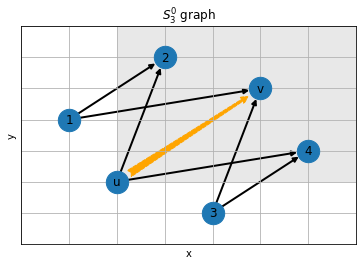

In [ ]:
#@title Draw the $S_3^0$ graph using weak dominance drawing
from matplotlib.patches import Rectangle, FancyArrowPatch

ax=plt.gca()
ax.add_patch(Rectangle((2,2), 5, 5, facecolor="lightgrey",alpha=0.5))
ax.add_patch(
    FancyArrowPatch((2,2),(5,5),
                    shrinkA=15,shrinkB=15,
                    arrowstyle='fancy',mutation_scale=18,
                    linestyle='dashed',hatch='\\',color='orange')
)

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$S_3^0$ graph')
plt.xlim(xmin=0,xmax=7)
plt.ylim(ymin=0,ymax=7)

DG=crown_DAG()
DG.pos={1:(1,4),2:(3,6),'u':(2,2),3:(4,1),4:(6,3),'v':(5,5)}
nx.draw_networkx(DG,pos=DG.pos,
                 node_size=500,width=2.0,label='$S_3^0$ graph')

----------

In [ ]:
#hide
# this should be the last cell of the notebook
from nbdev.export import notebook2script
notebook2script()

Converted 00_core.ipynb.
Converted 01_tools.ipynb.
Converted 02_related.ipynb.
Converted 03_example_graphs.ipynb.
Converted index.ipynb.
Converted Reachability_labels_for_version_control_graphs.ipynb.
Converted Reachability_queries_in_large_graphs.ipynb.
